In [37]:
import numpy as np
from igraph import *
import pandas as pd
import sys

import sys
sys.path.append('C:\\Users\\Anubhav\\Documents\\GitHub\\ddot')

import ddot
from ddot import Ontology
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import csv
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.sandbox.stats.multicomp import multipletests

from collections import defaultdict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import networkx as nx 

import matplotlib.pyplot as plt 
%matplotlib inline

In [38]:
#Loading clixo data
our_ont = 'option2_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.7.txt'
clixo_ont = pd.read_table(our_ont, dtype=str, comment='#', header=None, 
                          names=['Parent', 'Child', 'EdgeType', 'drop'])
clixo_ont.drop('drop', axis=1, inplace=True)
clixo_ont.loc[:, 'EdgeType'] = clixo_ont.EdgeType.str.replace('gene', 'Gene-Term').replace('default', 'Child-Parent')


clixo_ont.to_csv('finalontology2.txt', header=True, index=False, sep='\t', mode='a')

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


20.715384615384615
5.0
0.25     2.0
0.75    15.0
Name: Parent, dtype: float64


C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Frequency')

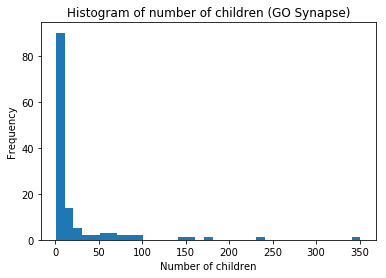

In [40]:
#Mean and median for Synapse ontology

data = pd.read_table("synapse.txt")
print(data.Parent.value_counts().mean())
print(data.Parent.value_counts().median())
print(data.Parent.value_counts().quantile([0.25,0.75]))

#print(data.Parent.value_counts())

plt.hist(data.Parent.value_counts(), bins=range(min(data.Parent.value_counts()), max(data.Parent.value_counts())+10, 10))
plt.title('Histogram of number of children (GO Synapse)')
plt.xlabel('Number of children')
plt.ylabel('Frequency')

In [57]:
print(len(set(data.Child[data.EdgeType=="Child-Parent"])))
print(len(set(data.Child[data.EdgeType=="Gene-Term"])))

192
1177


In [5]:
#distribution for our calculate ontology
data = clixo_ont
print(data.Parent.value_counts().mean())
print(data.Parent.value_counts().median())
print(data.Parent.value_counts().quantile([0.25,0.75]))

#print(data.Parent.value_counts())

21.508064516129032
13.0
0.25     9.0
0.75    19.0
Name: Parent, dtype: float64


Text(0, 0.5, 'Frequency')

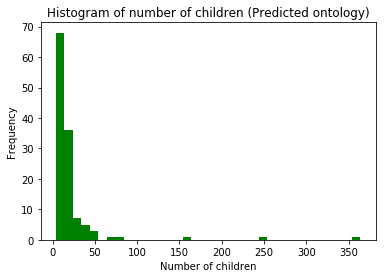

In [6]:

plt.hist(data.Parent.value_counts(), bins=range(min(data.Parent.value_counts()), max(data.Parent.value_counts())+10, 10), color="green")
plt.title('Histogram of number of children (Predicted ontology)')
plt.xlabel('Number of children')
plt.ylabel('Frequency')

In [56]:
print(len(set(data.Child[data.EdgeType=="Child-Parent"])))
print(len(set(data.Child[data.EdgeType=="Gene-Term"])))

192
1177


In [ ]:
## The appropriate way to calculate the number of modules...

print ('num synapse ontology terms', len(Ontology.from_table('finalontology2.txt').terms))
print ('num synapse ontology terms', len(Ontology.from_table('synapse.txt').terms))